# Aprendizaje Estadístico y Data Mining

## Práctica 2: El impacto del terrorismo a lo largo de la historia

### Objetivo
El problema del terrorismo es actualmente considerado uno de los más graves para la población. Es un hecho
que este ha ido cambiando a lo largo de la historia. Antaño los grupos terroristas actuaban en su propio país
o en los países con los que compartía frontera. Hoy en día el terrorismo se considera como un problema global
en el que prácticamente cualquier país puede sufrir sus consecuencias. En esta práctica intentaremos entender
varias situaciones tanto actuales cómo históricas.

Para ello haremos uso de un dataset con datos históricos de terrorismo desde el año 1970. El dataset contiene
es un archivo csv con distintos atributos para cada atentado registrado.

* [Link al dataset.](https://www.kaggle.com/datasets/START-UMD/gtd/downloads/globalterrorismdb_0718dist.csv/3)

**Instalación de las librerías necesarias**

In [1]:
#%pip install -q -r requirements.txt

### Apartado 1

**Enunciado:** Crear un DataFrame con las columnas esenciales: año (*iyear*), país (*country_txt*), región (*region_txt*), grupo terrorista (*gname*) y número de víctimas (*nkill*), y almacenarlo en un archivo CSV. Representar gráficamente la evolución del número total de víctimas por año mediante un diagrama de líneas para analizar si nos encontramos en la época más sangrienta de la historia. A continuación, generar otro diagrama de líneas que muestre el número de víctimas anuales por región para evaluar si la violencia ha sido constante en todas las zonas del mundo. Identificar posibles datos anómalos y destacar los años en los que el terrorismo ha tenido mayor impacto. Finalmente, examinar el impacto del 11S en el terrorismo a nivel mundial a partir de los datos obtenidos.

**Solución**

Para ello, realizaremos 3 estudios con diferentes datos.

#### 1. Impacto del terrorismo a través de los años

##### Preparación de datos
En primer lugar, realizaremos un DataFrame para filtrar la información importante, el cual posteriormente utilizaremos para generar un nuevo archivo CSV que contenga dichos datos. Para ello, haremos uso de la libreria pandas. 

A la hora de generar el DataFrame a partir del CSV, tenemos que tener en cuenta el encoding del mismo. En este caso, hemos utilizado Notepad++ para descubrirlo, ya era la forma más sencilla. Al hacerlo, vemos que está codificado en ANSI, por lo que utilizaremos el encoding de windows-1252.


In [2]:
import pandas as pd
df = pd.read_csv("data/globalterrorismdb_0718dist.csv", usecols=['iyear', 'country_txt','region_txt','gname','nkill'] ,encoding="windows-1252")
print(df.head())

   iyear         country_txt                   region_txt  \
0   1970  Dominican Republic  Central America & Caribbean   
1   1970              Mexico                North America   
2   1970         Philippines               Southeast Asia   
3   1970              Greece               Western Europe   
4   1970               Japan                    East Asia   

                                gname  nkill  
0                              MANO-D    1.0  
1  23rd of September Communist League    0.0  
2                             Unknown    1.0  
3                             Unknown    NaN  
4                             Unknown    NaN  


De esta manera, tenemos nuestro DataFrame creado con los datos filtrados del CSV. De esta forma, tenemos un DataFrame con los datos limpios, por lo que ya estaríamos preparados para iniciar el estudio.

Ahora, pasaremos este DataFrame a CSV de la siguiente manera.

In [3]:
df.to_csv('data/terrorismo_limpio.csv')

Teniendo estos datos, podemos comenzar a tratar con algúnas hipótesis planteadas. En primer lugar, con el fin de saber si nos encontramos en el año más violento, realizaremos un diagrama de línea con el total de víctimas de cada año. En este caso, utilizaremos la librería matplotlib.

In [4]:
import matplotlib.pyplot as plt

Lo primero que haremos será realizar una lista con los años de los que se tienen datos, de tal manera que extraigamos de forma única los años, que nos servirá para hacer el eje x.

In [5]:
años = df['iyear'].unique()
años = list(años)
años.sort()
print(años)

[np.int64(1970), np.int64(1971), np.int64(1972), np.int64(1973), np.int64(1974), np.int64(1975), np.int64(1976), np.int64(1977), np.int64(1978), np.int64(1979), np.int64(1980), np.int64(1981), np.int64(1982), np.int64(1983), np.int64(1984), np.int64(1985), np.int64(1986), np.int64(1987), np.int64(1988), np.int64(1989), np.int64(1990), np.int64(1991), np.int64(1992), np.int64(1994), np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017)]


Antes de continuar, comprobaremos que no haya campos con null, y en caso de haberlos, lo interpretaremos como que no se han registrado actos terroristas, es decir, 0.

In [6]:
print(df.isnull().sum())

iyear              0
country_txt        0
region_txt         0
gname              0
nkill          10313
dtype: int64


En este casom al ser número de muertes, podemos igualarlo a 0. De esta manera evitaremos datos anómalos y errores en las gráficas.

In [7]:
df['nkill'] = df['nkill'].fillna(0)
print(df.isnull().sum())

iyear          0
country_txt    0
region_txt     0
gname          0
nkill          0
dtype: int64


A continuación, debemos calcular el número de victimas de atentados terrorista por año. Para ello, agruparemos los datos del dataframe, centrandonos en los campos del año y el número de víctimas. De esta manera, y haciendo uso del método sum, nos hará el sumatorio de victimas de los atentados en cada año.

In [8]:
victimas_por_año = df.groupby('iyear')['nkill'].sum().tolist()
victimas_por_año

[174.0,
 173.0,
 566.0,
 370.0,
 539.0,
 617.0,
 674.0,
 456.0,
 1459.0,
 2100.0,
 4400.0,
 4851.0,
 5136.0,
 9444.0,
 10450.0,
 7094.0,
 4976.0,
 6482.0,
 7208.0,
 8152.0,
 7148.0,
 8429.0,
 9742.0,
 7690.0,
 6103.0,
 6966.0,
 10924.0,
 4688.0,
 3393.0,
 4403.0,
 7729.0,
 4805.0,
 3317.0,
 5743.0,
 6331.0,
 9380.0,
 12824.0,
 9157.0,
 9273.0,
 7827.0,
 8246.0,
 15497.0,
 22273.0,
 44490.0,
 38853.0,
 34871.0,
 26445.0]

Con esto, podemos hacer el gráfico de línea, de tal manera que nos permita saber cual es el año con más número de víctimas mortales en atentados de forma progresiva.

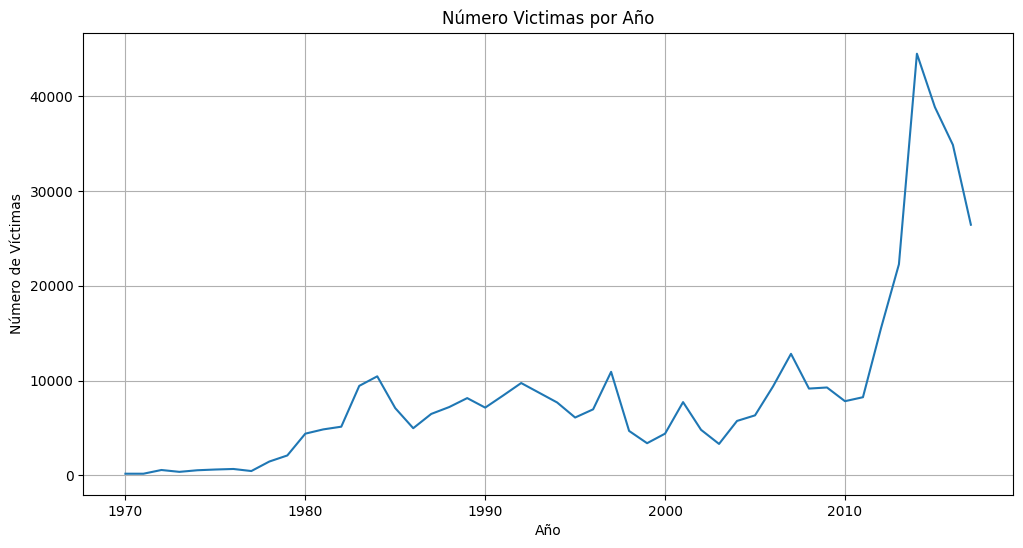

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(años, victimas_por_año)
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.title('Número Victimas por Año')
plt.grid(True)
plt.show()


Gracias al gráfico, podríamos concluir que definitivamente, **no nos encontramos** en el año más sangriento, pero si que es cierto que respecto a años anteriores, desde el 2012 superámos los números de años anteriores, por lo que a nivel de década, **si** nos encontramos en la época con más víctimas por atentados. El año que más número de víctimas de atentados terroristas fue en 2015, superando las 40000 víctimas. 

Estos datos son a nivel global, pero también sería interesante conocer los países con mayor número de víctimas anuales por región. En este caso, realizaremos un diagrama de líneas, que nos mostrará este balance simultaneamente. 
Para ello, debemos extraer nuestros datos agrupados por país.

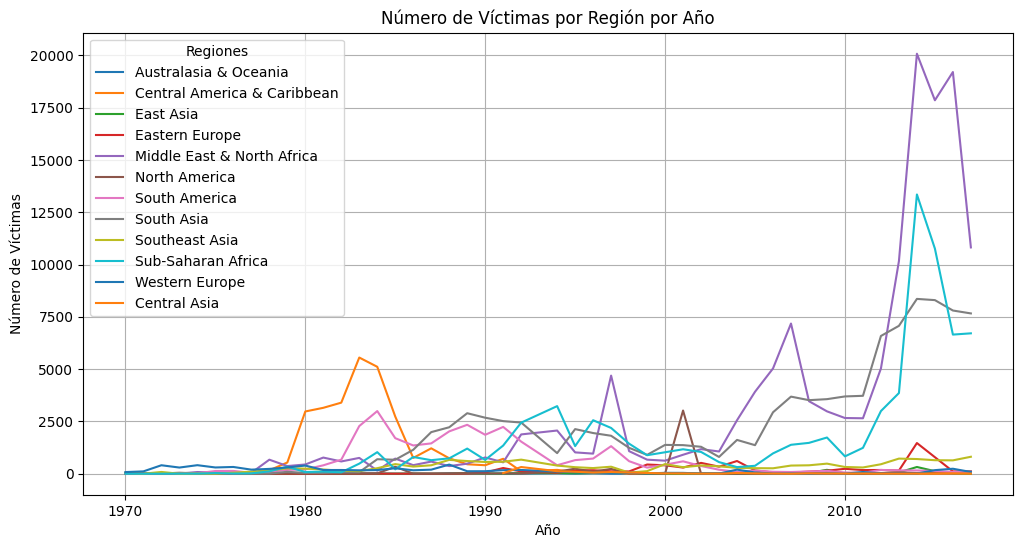

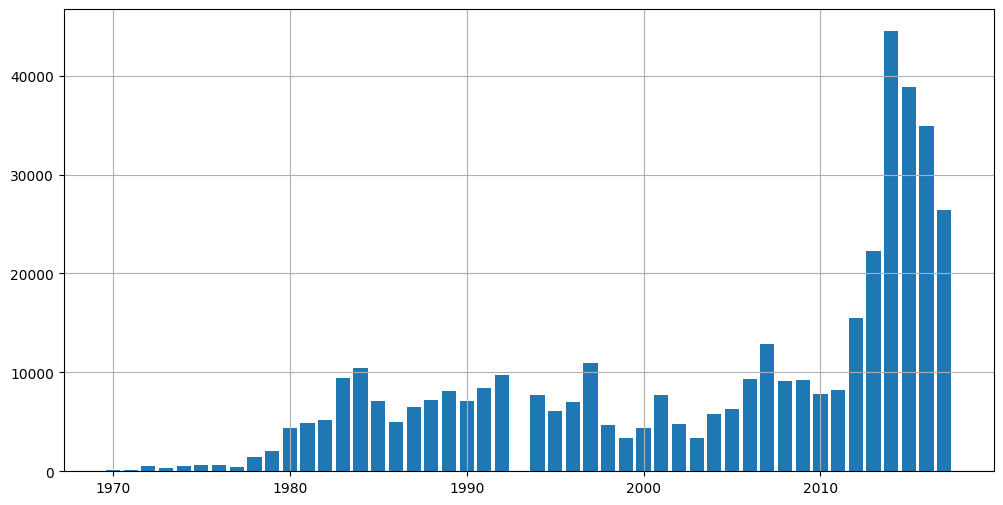

In [10]:
victimas_por_region= df.groupby(['iyear', 'region_txt'])['nkill'].sum().reset_index()
regiones = victimas_por_region['region_txt'].unique()

plt.figure(figsize=(12, 6))
for region in regiones:
    data_region = victimas_por_region[victimas_por_region['region_txt'] == region]
    plt.plot(data_region['iyear'], data_region['nkill'], label=region)

plt.xlabel('Año')

plt.ylabel('Número de Víctimas')
plt.title('Número de Víctimas por Región por Año')
plt.legend(title='Regiones')
plt.grid(True)

# Grafico de barras para ver mejor los años con picos de victimas
plt.figure(figsize=(12, 6))
plt.bar(años, victimas_por_año)
plt.grid(True)
plt.show()

Visto de esta forma, podemos decir que, en cierta manera, hay algunas regiones que historicamente, han tenido más episodios de violencia terrorista que el resto, en las que destacaría primer lugar el Medio-Este y el Norte de África, seguido un poco de las regiones del África Sub-Sahariano y del sur de Asia. También podemos observar un pico de atentados a partir del 2010, que cuadraría con el pico del gráfico que vimos anteriormente.

Con todos estos datos, podemos decir que los años en los que el terrorismo ha tenido más impacto ha sido desde el 2012 en adelante, con un pico máximo en 2014.

En cuanto al impacto del 11-S, podemos observar un pico precisamente en el año 2001, pero si nos vamos al gráfico de las regiones, podemos observar que tras este año, no volvieron a haber víctimas de terrorismo en Norte América. Si que es cierto que en los años posteriores, empezó el incremento, teniendo picos cada vez más altos en otras regiones, y haciendo que progresivamente fuesen habiendo más víctimas anuales.

### Apartado 2

**Enunciado:** Identificar los 10 grupos terroristas que han causado el mayor número de víctimas a lo largo de la historia y representar esta información mediante un *pie chart*. Analizar la distribución de los datos, interpretando qué organizaciones han tenido un impacto más significativo y si existe una gran diferencia entre ellas en términos de víctimas causadas.

**Solución**

Para ello, agruparemos el DataFrame por grupo terrorista, y sumaremos todas las muertes que se les atribuyen en sus atentados. Una vez agrupados, para que el piechart quede bien agrupado, ordenaremos el nuevo DataFrame por número de muertes.

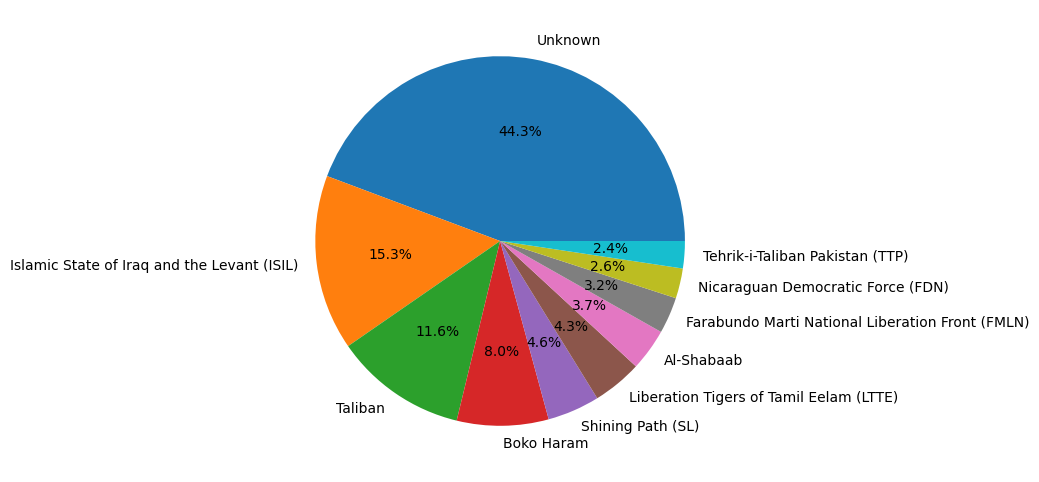

In [11]:
muertes_por_grupo = df.groupby('gname')['nkill'].sum().reset_index()
muertes_por_grupo = muertes_por_grupo.sort_values(by='nkill', ascending=False)

grupos_mas_sanguinarios = muertes_por_grupo.head(10)

plt.figure(figsize=(12,6))
plt.pie(grupos_mas_sanguinarios['nkill'], labels=grupos_mas_sanguinarios['gname'], autopct='%1.1f%%')
plt.show()

Basandonos en el piechart, lo primero que salta a la vista esque el 44.3% de las víctimas por terrorismo a lo largo de la historia, no han sido atribuidas a un grupo como tal, es decir, que se desconoce la autoría de dichos atentados. 

A esta cifra le sigue el ISIL (mayormente conocido como ISIS), los Talibanes y el Boko Haram, grupos terroristas populares, conocidos por promulgar una versión extremista del Islám, la ley sharía. A sus respectivos porcentajes, más allá de los atentados que hayan realizado en occidente, se le suma las víctimas de sus guerras territoriales, por lo que puede ser la razón por la que encabezan el gráfico. 

Los demás grupos son grupos terroristas con menor impacto, algunos como el Al-Shabaab movidos por la Yihad, y otros grupos de insurgentes a sus regímenes, que al final han sido considerados terroristas.

### Apartado 3

**Enunciado:** Encontrar un dataset con los PIBs de los distintos países y cruzarlo con el número de víctimas en atentados terroristas. Representar los datos mediante dos diagramas de dispersión: el primero mostrando la relación entre el número de víctimas y los 10 países con el PIB más bajo en el último año, y el segundo con los 10 países que han sufrido más víctimas en atentados y sus respectivos PIBs. Analizar los resultados para identificar posibles correlaciones entre crisis económicas y el impacto del terrorismo.

**Solución**

En este caso hemos decidido utilizar [este dataset](https://www.kaggle.com/datasets/fredericksalazar/pib-gdp-global-by-countries-since-1960-to-2021/data), que contiene los datos del PIB de todos los países desde 1960 hasta 2023. 

Con el dataset elegido, nos crearemos nuestro DataFrame con las columnas que nos interesan, que en este caso será el nombre del país, el año, y el PIB total en millones. Al intentar crear el dataframe, tuvimos que indicar el delimitador, ya que si no, pandas no detectaba la diferencia entre columnas.

In [12]:
df_pib = pd.read_csv("data/countries_gdp_hist.csv", usecols=['country_name', 'year', 'total_gdp_million'], delimiter=";")

Ahora, prepararemos los DataFrames, cogiendo los datos del último año. En este caso como nuestro dataset del terrorismo llega hasta 2017, cogeremos los datos de ese año. Omitiremos los casos en los que el PIB es 0, ya que coincide con territorios como Gibraltar o Korea del Norte, donde los datos pueden no ser reales o directamente no sea relevante.


In [13]:
pib_mayor_cero = df_pib[df_pib['total_gdp_million'] > 0]

pib_2017 = pib_mayor_cero[pib_mayor_cero['year'] == 2017]
terrorismo_2017 = df[df['iyear'] == 2017]

#Agrupamos el dataframe de terrorismo por paises y el número por víctimas por país.
mayor_terrorismo_2017 = terrorismo_2017.groupby('country_txt')['nkill'].sum().sort_values(ascending=False).head(10)

#Agrupamos el dataframe de PIB por menor PIB en millones
menor_pib_2017 = pib_2017.sort_values('total_gdp_million').head(10)



Ya con los DataFrames acotados al año y agrupados por países, tocaría preparar los DataFrames. Como más adelante vamos a tener que fusionar ambos por país, debemos asegurarnos de que el formato sea el mismo. Para ello, en primer lugar observaremos como están escritos.

In [14]:
menor_pib_2017_paises = menor_pib_2017['country_name'].tolist()
mayor_terrorismo_2017_paises = mayor_terrorismo_2017.index.tolist()
"""
print(menor_pib_2017_paises)
print(mayor_terrorismo_2017_paises)
"""


'\nprint(menor_pib_2017_paises)\nprint(mayor_terrorismo_2017_paises)\n'

A simple vista, podemos ver que los nombres de los paises del dataset del PIB están en mayúsculas, por lo que en primer lugar, haremos que los paises del dataset del terrorismo también lo estén.

In [15]:
terrorismo_2017.loc[:,'country_txt'] = terrorismo_2017['country_txt'].str.upper()
mayor_terrorismo_2017 = terrorismo_2017.groupby('country_txt')['nkill'].sum().sort_values(ascending=False).head(10)
mayor_terrorismo_2017_paises = mayor_terrorismo_2017.index.tolist()
terrorismo_2017_paises = terrorismo_2017['country_txt'].unique().tolist()

Ya con los nombres en mayúsculas, tendríamos la mayor parte de los países cubiertos. Aún así, hay casos especiales que debemos mirar, como por ejemplo, países como Micronesia, ya que tiene un formato peculiar, consistente en: NOMBREPAIS (REPUBLICA/ESTADO). Esto podría ocurrir también con paises como El Congo o Republica Dominicana. Es por eso que haremos una busqueda en el dataframe sobre estos países. Como solo vamos a utilizar los 20 paises listados anteriormente, podemos buscarlos directamente.

In [16]:
paises_terror_ordenados = sorted(terrorismo_2017['country_txt'].unique())
paises_pib_ordenados = sorted(pib_2017['country_name'].unique())

#print(paises_terror_ordenados)
#print(paises_pib_ordenados)

Al listar los paises así, vemos que en principio, el único problema que habría sería con El Congo y Republica Dominicana, por lo que sustituiremos el nombre en el DataFrame del PIB para que sea coincidente con el del terrorismo.

In [17]:
pib_2017.loc[:,'country_name'] = pib_2017['country_name'].replace(
    {'CONGO, DEMOCRATIC REPUBLIC OF THE': 'DEMOCRATIC REPUBLIC OF THE CONGO', 'CONGO': 'DEMOCRATIC REPUBLIC OF THE CONGO', 'DOMINICA': 'DOMINICAN REPUBLIC'}
)
menor_pib_2017_paises = menor_pib_2017['country_name'].tolist()



Como el Dataset de terrorismo no tiene menos países que el del PIB, utilizaremos aquellos que **sí** que tengan en común.

In [18]:
menor_pib_2017_comunes = pib_2017[pib_2017['country_name'].isin(terrorismo_2017_paises)]
menor_pib_2017 = menor_pib_2017_comunes.sort_values('total_gdp_million').head(10)
menor_pib_2017_paises = menor_pib_2017['country_name'].tolist()
print(sorted(menor_pib_2017_paises))
print(sorted(terrorismo_2017_paises))


['BURUNDI', 'CENTRAL AFRICAN REPUBLIC', 'DJIBOUTI', 'DOMINICAN REPUBLIC', 'KYRGYZSTAN', 'LIBERIA', 'MALDIVES', 'SIERRA LEONE', 'SOMALIA', 'TAJIKISTAN']
['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANGOLA', 'ARGENTINA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN', 'BAHRAIN', 'BANGLADESH', 'BELGIUM', 'BRAZIL', 'BURKINA FASO', 'BURUNDI', 'CAMEROON', 'CANADA', 'CENTRAL AFRICAN REPUBLIC', 'CHAD', 'CHILE', 'CHINA', 'COLOMBIA', 'CZECH REPUBLIC', 'DEMOCRATIC REPUBLIC OF THE CONGO', 'DJIBOUTI', 'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT', 'ETHIOPIA', 'FINLAND', 'FRANCE', 'GABON', 'GEORGIA', 'GERMANY', 'GREECE', 'HONDURAS', 'INDIA', 'INDONESIA', 'IRAN', 'IRAQ', 'IRELAND', 'ISRAEL', 'ITALY', 'IVORY COAST', 'JAMAICA', 'JORDAN', 'KENYA', 'KOSOVO', 'KYRGYZSTAN', 'LAOS', 'LATVIA', 'LEBANON', 'LIBERIA', 'LIBYA', 'MACEDONIA', 'MALAWI', 'MALAYSIA', 'MALDIVES', 'MALI', 'MALTA', 'MEXICO', 'MOZAMBIQUE', 'MYANMAR', 'NEPAL', 'NETHERLANDS', 'NIGER', 'NIGERIA', 'NORWAY', 'PAKISTAN', 'PAPUA NEW GUINEA', 'PARAGUAY', 'PERU', 'PH

Ya con los datos verificados, procederemos a fusionar los DataFrames. En este caso, haremos la combinación mediante el nombre del país, y solo utilizaremos los países que estén en ambos DataFrames (de ahí el método de combinación inner).

In [19]:
# DataFrame 1, PIB más bajo en el último año y el número de víctimas en atentados
terrorismo_2017_filtrado = terrorismo_2017[terrorismo_2017['country_txt'].isin(menor_pib_2017_paises)]
df_menor_pib_terrorismo = pd.merge(menor_pib_2017, terrorismo_2017_filtrado, left_on='country_name', right_on='country_txt', how='inner')

df_menor_pib_terrorismo = df_menor_pib_terrorismo.groupby(['country_name', 'year', 'total_gdp_million'], as_index=False)['nkill'].sum()
df_menor_pib_terrorismo = df_menor_pib_terrorismo[['country_name', 'year', 'total_gdp_million', 'nkill']]

df_menor_pib_terrorismo = df_menor_pib_terrorismo.sort_values(by='total_gdp_million', ascending=True)

print(df_menor_pib_terrorismo)


               country_name  year  total_gdp_million   nkill
3        DOMINICAN REPUBLIC  2017         521.551852     2.0
1  CENTRAL AFRICAN REPUBLIC  2017        2072.349973   601.0
0                   BURUNDI  2017        2723.586963    20.0
2                  DJIBOUTI  2017        2762.581334     0.0
5                   LIBERIA  2017        3390.703400     0.0
6                  MALDIVES  2017        4816.426257     1.0
7              SIERRA LEONE  2017        5818.480352     0.0
9                TAJIKISTAN  2017        7536.402853     1.0
8                   SOMALIA  2017        7621.501720  1912.0
4                KYRGYZSTAN  2017        7702.938379     0.0


In [20]:
# DataFrame 2, 10 países con más víctimas en el último año y sus PIBs
top_10_terrorismo_2017 = mayor_terrorismo_2017.head(10)
paises_mayor_terrorismo = top_10_terrorismo_2017.index.tolist()

pib_mayor_terrorismo_2017 = pib_2017[pib_2017['country_name'].isin(paises_mayor_terrorismo)]
df_mayor_terrorismo_pib = pd.merge(pib_mayor_terrorismo_2017, mayor_terrorismo_2017, left_on='country_name', right_index=True, how='inner')
df_mayor_terrorismo_pib = df_mayor_terrorismo_pib[['country_name', 'year', 'total_gdp_million', 'nkill']]

df_mayor_terrorismo_pib = df_mayor_terrorismo_pib .sort_values(by='nkill', ascending=True)

print(df_mayor_terrorismo_pib)


                           country_name  year  total_gdp_million   nkill
2553   DEMOCRATIC REPUBLIC OF THE CONGO  2017       11834.473039   596.0
2489   DEMOCRATIC REPUBLIC OF THE CONGO  2017       38019.264795   596.0
2041           CENTRAL AFRICAN REPUBLIC  2017        2072.349973   601.0
13561                             YEMEN  2017       26842.228829   762.0
3641                              EGYPT  2017      248362.771739   877.0
9593                           PAKISTAN  2017      339205.534861  1076.0
9081                            NIGERIA  2017      375745.731053  1805.0
11193                           SOMALIA  2017        7621.501720  1912.0
121                         AFGHANISTAN  2017       18753.456498  6092.0
5881                               IRAQ  2017      187217.660051  6476.0


Ya con el nuevo DataFrame generado, podemos proceder con la creación de los diagramas de dispersión.

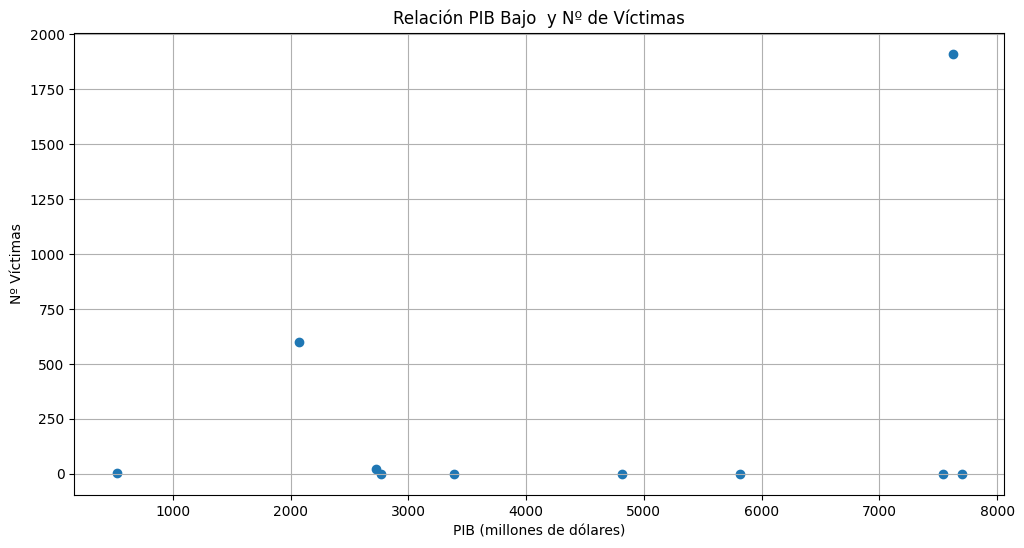

In [21]:
# Diagrama 1
plt.figure(figsize=(12, 6))
plt.scatter(df_menor_pib_terrorismo['total_gdp_million'], df_menor_pib_terrorismo['nkill'])

# Añadir título y etiquetas a los ejes
plt.title("Relación PIB Bajo  y Nº de Víctimas")
plt.xlabel("PIB (millones de dólares)")
plt.ylabel("Nº Víctimas")
plt.grid(True)
# Mostrar el gráfico
plt.show()
